Created: Monday 29Aug2022

Author: Lynn Menchaca

The purpose of this document is to analyze all the collected NFL data.

Resources:

1)
Author: Alex -> 
Article: Pie Charts with Labels in Matplotlib -> 
Website:
https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.patches import ConnectionPatch
from matplotlib.pyplot import figure

In [2]:
#parse_dates=True
data_file_path = '/Users/lynnpowell/Documents/DS_Projects/NFL_Analysis/Data_Sets/'
nfl = pd.read_csv(data_file_path+'nfl_cleaned_data.csv', parse_dates=['DateTime'])

In [3]:
nfl.head()

Season       Week            DateTime  H_WinTeam    HomeTeam  HomePts  \
0    2021  ConfChamp 2022-01-30 18:30:00        1.0        Rams     20.0   
1    2021  ConfChamp 2022-01-30 15:00:00        0.0      Chiefs     24.0   
2    2021   Division 2022-01-23 18:30:00        1.0      Chiefs     42.0   
3    2021   Division 2022-01-23 15:00:00        0.0  Buccaneers     27.0   
4    2021   Division 2022-01-22 20:15:00        0.0     Packers     10.0   

   HomeYds  HomeTO AwayTeam  AwayPts  ...  RUN_Away  SACK_Away PEN_Away  \
0    396.0     1.0    49ers     17.0  ...       2.7      -13.1      1.7   
1    375.0     2.0  Bengals     27.0  ...      18.1       -9.0      4.7   
2    552.0     0.0    Bills     36.0  ...      18.1       -9.0      4.7   
3    359.0     2.0     Rams     30.0  ...       4.9       -8.7      3.8   
4    263.0     1.0    49ers     13.0  ...       5.2      -12.6      5.4   

  RAW_Away       QBName_Away QB_Pre_RK_Away div_game  out_conf  \
0     64.2  Matthew Stafford           15.0        1         0   
1     63.0   Patrick Mahomes            2.0        0         0   
2     63.0   Patrick Mahomes            2.0        0         0   
3     67.1         Tom Brady            9.0        0         0   
4     68.2     Aaron Rodgers            1.0        0         0   

         Rest_Away         Rest_Home  
0  7 days 22:15:00   7 days 03:30:00  
1  7 days 22:30:00   6 days 20:30:00  
2  7 days 22:15:00   6 days 22:15:00  
3  5 days 18:45:00   7 days 02:00:00  
4  6 days 03:35:00  13 days 07:15:00  

[5 rows x 96 columns]

In [4]:
nfl.columns

Index(['Season', 'Week', 'DateTime', 'H_WinTeam', 'HomeTeam', 'HomePts',
       'HomeYds', 'HomeTO', 'AwayTeam', 'AwayPts', 'AwayYds', 'AwayTO',
       'Capacity', 'Opened', 'Turf', 'Cost', 'Stadium_Roof', 'Fan_Repu',
       'Weather', 'Location', 'Div_Home', 'Conf_Home', 'Rank_Off_Home',
       'Yards/G_Off_Home', 'Rush/G_Off_Home', 'Rush/P_Off_Home',
       'Pass/G_Off_Home', 'QBR_Off_Home', 'Sacks_Off_Home', '3rd%_Off_Home',
       'Poss/G_Off_Home', 'Pts/G_Off_Home', 'Off_Pre_RK_Home', 'Rank_Def_Home',
       'Yards/G_Def_Home', 'Rush/G_Def_Home', 'Rush/P_Def_Home',
       'Pass/G_Def_Home', 'QBR_Def_Home', 'Sacks_Def_Home', '3rd%_Def_Home',
       'Poss/G_Def_Home', 'Pts/G_Def_Home', 'Def_Pre_RK_Home', 'RK_Home',
       'QBR_Home', 'PAA_Home', 'Plays_Home', 'EPA_Home', 'PASS_Home',
       'RUN_Home', 'SACK_Home', 'PEN_Home', 'RAW_Home', 'QBName_Home',
       'QB_Pre_RK_Home', 'Div_Away', 'Conf_Away', 'Rank_Off_Away',
       'Yards/G_Off_Away', 'Rush/G_Off_Away', 'Rush/P_Off_Away',

In [5]:
# Drop all of the null valus for H_WinTeam, this is the column we are trying to predict later
print("Tie games or other: " + str(nfl['H_WinTeam'].isnull().sum()))
nfl = nfl.dropna(subset=['H_WinTeam'], axis=0)
print("Missing winning games: " + str(nfl['H_WinTeam'].isnull().sum()))

Tie games or other: 10
Missing winning games: 0


In [6]:
nfl.shape

(3999, 96)

In [7]:
#Creating a function that takes delta of the win and losing teams stats
def delta_wl(col_name, home, away):
    nfl[col_name] = nfl.apply(lambda x: x[home]-x[away] if x['H_WinTeam']==1
                             else x[away] - x[home], axis=1)

Home Games Won: 2247
Away Games Won: 1752


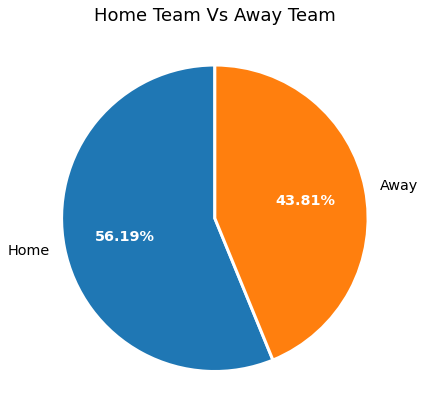

In [8]:
#Using resource from Alex -> Pie Charts with Labels in Matplotlib
#Pie chart of Home Team winning vs Away
print('Home Games Won: ' + str(nfl['H_WinTeam'].value_counts()[1]))
print('Away Games Won: ' + str(nfl['H_WinTeam'].value_counts()[0]))
labels = ['Home', 'Away']
values = [nfl['H_WinTeam'].value_counts()[1], nfl['H_WinTeam'].value_counts()[0]]

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    x=values, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Home Team Vs Away Team', fontsize=18)
plt.tight_layout()
#plt.pie(x=values, labels=labels, autopct='%.2f%%', textprops={'size': 'x-large'})
#plt.setp(pct, color='white', fontweight='bold')
#plt.show()

In [9]:
#Only using the games the conferences don't match for home and away
out_conf_headers = ['Season','H_WinTeam','Conf_Home','Conf_Away', 'Div_Home', 'Div_Away','HomeTeam','AwayTeam']
out_conf = nfl[out_conf_headers][nfl['Conf_Home']!=nfl['Conf_Away']]
print(out_conf.head())

#Make a table of just the win, divisions and conferences - Away
out_conf_away = out_conf[['Season','H_WinTeam','Conf_Away', 'Div_Away','AwayTeam'
                 ]][out_conf['H_WinTeam']==0]
out_conf_away = out_conf_away.rename({'H_WinTeam':'H_Win', 'Conf_Away':'Conf', 'Div_Away':'Div', 'AwayTeam':'Team'},axis=1)
print(out_conf_away.head())

#Make a table of just the win, divisions and conferences - Home
out_conf_home = out_conf[['Season','H_WinTeam','Conf_Home', 'Div_Home', 'HomeTeam'
                 ]][out_conf['H_WinTeam']==1]
out_conf_home = out_conf_home.rename({'H_WinTeam':'H_Win', 'Conf_Home':'Conf', 'Div_Home':'Div','HomeTeam':'Team'},axis=1)
print(out_conf_home.head())

#combinning both files to make the data easier to plot and analyze
out_conf_stats = pd.concat([out_conf_home, out_conf_away], axis=0)
#The number of rows matches the full data frame 'nfl'
print(out_conf_stats.shape)
#print(out_conf_stat.head())


    Season  H_WinTeam Conf_Home Conf_Away   Div_Home   Div_Away HomeTeam  \
30    2021        0.0       AFC       NFC  AFC North   NFC West   Ravens   
32    2021        1.0       NFC       AFC   NFC West  AFC South    49ers   
34    2021        1.0       AFC       NFC   AFC East  NFC South    Bills   
43    2021        0.0       AFC       NFC   AFC East  NFC South     Jets   
44    2021        0.0       NFC       AFC  NFC South   AFC East   Saints   

      AwayTeam  
30        Rams  
32      Texans  
34     Falcons  
43  Buccaneers  
44    Dolphins  
    Season  H_Win Conf        Div        Team
30    2021    0.0  NFC   NFC West        Rams
43    2021    0.0  NFC  NFC South  Buccaneers
44    2021    0.0  AFC   AFC East    Dolphins
57    2021    0.0  AFC  AFC South       Colts
71    2021    0.0  NFC  NFC North     Packers
    Season  H_Win Conf        Div     Team
32    2021    1.0  NFC   NFC West    49ers
34    2021    1.0  AFC   AFC East    Bills
58    2021    1.0  NFC  NFC North  P

In [10]:
#Examing the data for the out of conference games

#out_conf_stats['Conf'].groupby(out_conf['DateTime'].dt.year).value_counts()
out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().unstack()

Conf    AFC  NFC
Season          
2007     32   32
2008     34   29
2009     37   27
2010     34   30
2011     31   33
2012     25   39
2013     30   34
2014     33   30
2015     29   35
2016     33   30
2017     23   41
2018     34   30
2019     31   33
2020     35   28
2021     39   40

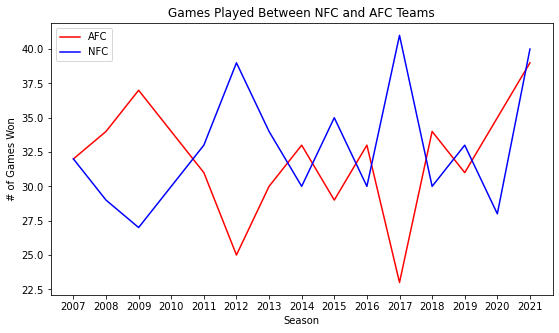

In [11]:
#Ploting the data for the out of conference games

#out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().plot.bar()
fig = plt.subplots(1, 1, figsize=(9,5))
plt.plot(out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().unstack()['AFC'], color='red', label='AFC')
plt.plot(out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().unstack()['NFC'], color='blue', label='NFC')
plt.legend()
plt.title('Games Played Between NFC and AFC Teams')
plt.ylabel('# of Games Won')
plt.xlabel('Season')
plt.xticks(np.arange(min(out_conf_stats['Season']), max(out_conf_stats['Season'])+1))
#width = 10
#height = 6
#fig.set_size_inches(width, height)
#figure(figsize=(10, 6), dpi=160)
plt.show()

NFC Games Won: 491
AFC Games Won: 480


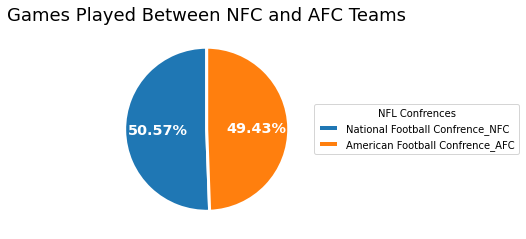

In [12]:
#Total comparison of games the NFC and AFC played
#Only using the games the conferences don't match for home and away

#afc_sum = out_conf['Conf_Home'][out_conf['H_WinTeam']==1].value_counts()['AFC'] + out_conf['Conf_Away'][out_conf['H_WinTeam']==0].value_counts()['AFC']
#nfc_sum = out_conf['Conf_Home'][out_conf['H_WinTeam']==1].value_counts()['NFC'] + out_conf['Conf_Away'][out_conf['H_WinTeam']==0].value_counts()['NFC']

afc_sum = out_conf_stats['Conf'].value_counts()['AFC']
nfc_sum = out_conf_stats['Conf'].value_counts()['NFC']

print('NFC Games Won: ' + str(nfc_sum))
print('AFC Games Won: ' + str(afc_sum))

#Pie Chart
labels = ['National Football Confrence_NFC', 'American Football Confrence_AFC']
values = [nfc_sum, afc_sum]

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    x=values, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Games Played Between NFC and AFC Teams', fontsize=18)
ax.legend(patches, labels,
          title="NFL Confrences",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()

In [13]:
#Looking at division winners for games played outside of Conference
print(out_conf_stats['Div'].value_counts())
print(out_conf_stats['Team'][out_conf_stats['Div']=='AFC North'].value_counts())
print(out_conf_stats['Team'][out_conf_stats['Div']=='AFC South'].value_counts())

AFC North    126
NFC West     125
AFC East     125
NFC North    125
NFC South    124
AFC West     119
NFC East     117
AFC South    110
Name: Div, dtype: int64
Steeler    39
Ravens     39
Bengals    27
Browns     21
Name: Team, dtype: int64
Titans     37
Colts      36
Texans     25
Jaguars    12
Name: Team, dtype: int64


In [14]:
#Looking at the top 10 teams for winning games played outside of conference
#out_conf_stats['Team'].value_counts().head(10)
out_conf_stats['Team'].groupby(out_conf_stats['Conf']).value_counts().sort_values(ascending=False).head(13)

Conf  Team     
AFC   Patriots     44
NFC   Packers      40
AFC   Steeler      39
      Ravens       39
      Chiefs       37
NFC   Saints       37
AFC   Titans       37
      Colts        36
      Broncos      34
NFC   Seahawks     34
      Cardinals    34
      Eagles       34
      Bears        33
Name: Team, dtype: int64


***

Based off the data above, it looks like the NFC is the conference with the most wins. Looking at the rest of the data I am a little suprised by this becusae the AFC has the division (AFC North) with the most out of conference wins. The AFC also has 7 teams in the top 9.

It looks like what hurst the AFC conference is the AFC South division. The total difference of wins between the AFC and NFC is 11 points and AFC South is 7 points of that point difference. The NFC also has the 3 divisions in the top 5, helping NFC catch up to AFC.

It is interesting to see every other year the NFC and AFC alterate who has the most total wins for that season. Next is analyzing the divisions, the goal is to see if this is from drafting new players (the teams on the bottom help bring up the over all performance) or if this is from the middle teams have a good team and a densent draft position or is this from the top teams continuing to improve?

***


In [15]:
#Only using the games played in the same conference and outside of the division
out_div_headers = ['Season','H_WinTeam','Conf_Home','Conf_Away', 'Div_Home', 'Div_Away','HomeTeam','AwayTeam']
out_div = nfl[out_div_headers][(nfl['Conf_Home']==nfl['Conf_Away']) & (nfl['Div_Home'] != nfl['Div_Away'])]
print(out_div.head(10))

#Make a table of just the win, divisions and conferences - Away
out_div_away = out_div[['Season','H_WinTeam','Conf_Away', 'Div_Away','AwayTeam'
                 ]][out_div['H_WinTeam']==0]
out_div_away = out_div_away.rename({'H_WinTeam':'H_Win', 'Conf_Away':'Conf', 'Div_Away':'Div', 'AwayTeam':'Team'},axis=1)
print(out_div_away.head())

#Make a table of just the win, divisions and conferences - Home
out_div_home = out_div[['Season','H_WinTeam','Conf_Home', 'Div_Home', 'HomeTeam'
                 ]][out_div['H_WinTeam']==1]
out_div_home = out_div_home.rename({'H_WinTeam':'H_Win', 'Conf_Home':'Conf', 'Div_Home':'Div','HomeTeam':'Team'},axis=1)
print(out_div_home.head())

#combinning both files to make the data easier to plot and analyze
out_div_stats = pd.concat([out_conf_home, out_conf_away], axis=0)
#The number of rows matches the full data frame 'nfl'
print(out_div_stats.shape)
#print(out_conf_stat.head())

    Season  H_WinTeam Conf_Home Conf_Away   Div_Home   Div_Away    HomeTeam  \
1     2021        0.0       AFC       AFC   AFC West  AFC North      Chiefs   
2     2021        1.0       AFC       AFC   AFC West   AFC East      Chiefs   
3     2021        0.0       NFC       NFC  NFC South   NFC West  Buccaneers   
4     2021        0.0       NFC       NFC  NFC North   NFC West     Packers   
5     2021        0.0       AFC       AFC  AFC South  AFC North      Titans   
7     2021        1.0       AFC       AFC   AFC West  AFC North      Chiefs   
8     2021        0.0       NFC       NFC   NFC East   NFC West     Cowboys   
9     2021        1.0       NFC       NFC  NFC South   NFC East  Buccaneers   
11    2021        1.0       AFC       AFC  AFC North   AFC West     Bengals   
31    2021        1.0       NFC       NFC   NFC West  NFC North    Seahawks   

   AwayTeam  
1   Bengals  
2     Bills  
3      Rams  
4     49ers  
5   Bengals  
7   Steeler  
8     49ers  
9    Eagles  
11  

In [16]:
#In conference but out of division stats broken out by season
out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()

Div     AFC East  AFC North  AFC South  AFC West  NFC East  NFC North  \
Season                                                                  
2007           5         10         13         4        11         12   
2008          11          7         11         5         8          5   
2009           9          8         12         8         8          8   
2010           9          9          7         9         9          7   
2011           8         10          5         8         8          8   
2012           6          8          6         5         8         10   
2013           8          8          3        11         5          8   
2014           9         12          4         8        12          7   
2015           9          8          6         6         7         10   
2016          10          4          9        10        11          7   
2017           6          6          4         7         9         10   
2018           7          9         10         8         6          9   
2019          11          6          6         8         5          8   
2020           8         11          8         8         4          8   
2021           9         10          6        14         6          8   

Div     NFC South  NFC West  
Season                       
2007            3         6  
2008           11         5  
2009            7         4  
2010            7         7  
2011           11         6  
2012           11        10  
2013            8        13  
2014            3         8  
2015           10         8  
2016            6         6  
2017           10        12  
2018            7         8  
2019           10        10  
2020            8         8  
2021           12        14

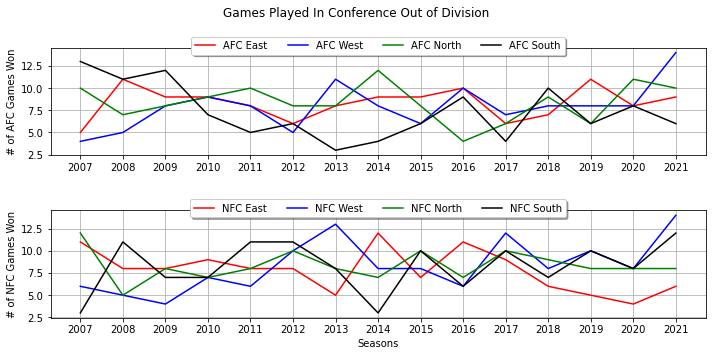

In [17]:
#Plotting the AFC and NFC division win count for each season

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))
fig.suptitle('Games Played In Conference Out of Division')

#AFC Divisions
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC East'], color='red', label='AFC East')
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC West'], color='blue', label='AFC West')
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC North'], color='green', label='AFC North')
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC South'], color='black', label='AFC South')
#ax1.legend(bbox_to_anchor=(1.1, 1.05))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=True)
ax1.set(xlabel=' ', ylabel='# of AFC Games Won')
#plt.ylabel('# of Games Won')
#plt.xlabel('Season')
ax1.xaxis.set_ticks(np.arange(min(out_div_stats['Season']), max(out_div_stats['Season'])+1))

#NFC Divisions
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC East'], color='red', label='NFC East')
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC West'], color='blue', label='NFC West')
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC North'], color='green', label='NFC North')
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC South'], color='black', label='NFC South')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=True)
ax2.set(xlabel=' ', ylabel='# of AFC Games Won')
#plt.ylabel('# of Games Won')
#plt.xlabel('Season')
plt.xticks(np.arange(min(out_div_stats['Season']), max(out_div_stats['Season'])+1))
ax2.set(xlabel='Seasons', ylabel='# of NFC Games Won')

fig.tight_layout()
ax1.grid()
ax2.grid()
plt.show()

In [18]:
#Examing the data for in conference but out of division games

#out_div_stats['Div'].groupby(out_conf_stats['Season']).value_counts().unstack()
print(out_div_stats['Div'].value_counts())

#The results appear to be the same as the out of Conference games
print('\n')
print('AFC North Teams')
print(out_conf_stats['Team'][out_conf_stats['Div']=='AFC North'].value_counts())
print('NFC West Teams')
print(out_conf_stats['Team'][out_conf_stats['Div']=='NFC West'].value_counts())
print('NFC North Teams')
print(out_conf_stats['Team'][out_conf_stats['Div']=='NFC North'].value_counts())

AFC North    126
NFC West     125
AFC East     125
NFC North    125
NFC South    124
AFC West     119
NFC East     117
AFC South    110
Name: Div, dtype: int64


AFC North Teams
Steeler    39
Ravens     39
Bengals    27
Browns     21
Name: Team, dtype: int64
NFC West Teams
Seahawks     34
Cardinals    34
49ers        31
Rams         26
Name: Team, dtype: int64
NFC North Teams
Packers    40
Bears      33
Vikings    31
Lions      21
Name: Team, dtype: int64


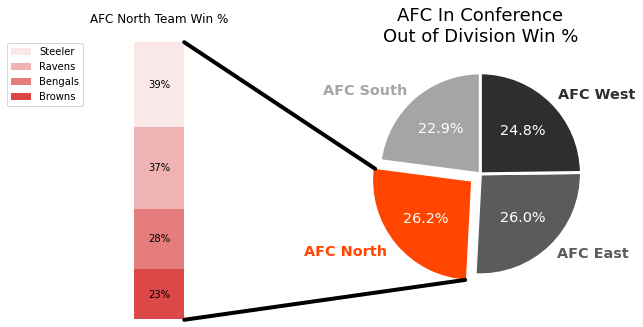

In [95]:
#Looking to see what divisions has the won the most games in the NFC

#divisions in AFC
afc_north = out_div_stats['Div'].value_counts()['AFC North']
afc_south = out_div_stats['Div'].value_counts()['AFC South']
afc_east = out_div_stats['Div'].value_counts()['AFC East']
afc_west = out_div_stats['Div'].value_counts()['AFC West']

#teams in AFC South
#calculating the win percentage for each team = 
# = total team wins from out_div_stats dataframe 
#/ total games team played from out_div data frame (in conference but outside of division)
pit = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Steeler'] / out_div[(out_div['HomeTeam']=='Steeler')|(out_div['AwayTeam']=='Steeler')].shape[0]
bal = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Ravens'] / out_div[(out_div['HomeTeam']=='Ravens')|(out_div['AwayTeam']=='Ravens')].shape[0]
cin = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Bengals'] / out_div[(out_div['HomeTeam']=='Bengals')|(out_div['AwayTeam']=='Bengals')].shape[0]
cle = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Browns'] / out_div[(out_div['HomeTeam']=='Browns')|(out_div['AwayTeam']=='Browns')].shape[0]

afc_labels = ['AFC South', 'AFC North', 'AFC East', 'AFC West']
afc_values = [afc_south, afc_north, afc_east, afc_west]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))
fig.subplots_adjust(wspace=0)

# Get four different grey colors.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(afc_values))))
# Swap in a bright blue for the Lacrosse color.
colors[1] = 'orangered'

# You could also just manually assign colors very easily.
# colors = ['purple', 'black', 'pink', 'aqua']

patches, texts, pcts = ax2.pie(
    afc_values, labels=afc_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    #explode is use to select what wedge slides out
    explode=(0, 0.1, 0, 0))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax2.set_title('AFC In Conference' + '\n' 'Out of Division Win %', fontsize=18)
plt.tight_layout()


#Creating bar chart for games won by each nfc south team
afcnorth_labels = ['Browns', 'Bengals', 'Ravens', 'Steeler']
afcnorth_values = [cle, cin, bal, pit]
bottom = 1
width = 0.5

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(afcnorth_values, afcnorth_labels)])):
    bottom -= height
    bc = ax1.bar(0, height, width, bottom=bottom, color='C3', label=label,
                 alpha=0.1 + 0.25 * j)
    ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('AFC North Team Win %')
ax1.legend(bbox_to_anchor=(0.2, 0.95), loc='upper right', borderaxespad=0)
ax1.axis('off')
ax1.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = patches[0].theta1, patches[0].theta2
center, r = patches[0].center, patches[0].r
bar_height = sum(afcnorth_values)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
con = ConnectionPatch(xyA=(-width / 0.48, 0.05), coordsA=ax2.transData,
                      xyB=(x+0.25, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

# draw bottom connecting line
#x = r * np.cos(np.pi / 180 * theta2) + center[0]
#y = r * np.sin(np.pi / 180 * theta2) + center[1]
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
con = ConnectionPatch(xyA=(-0.15, -1.05), coordsA=ax2.transData,
                      xyB=(x+0.25, y-1.27), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

plt.show()

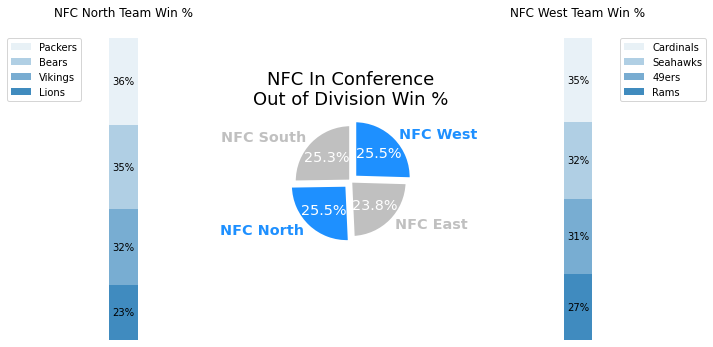

In [96]:
#Looking to see what divisions has the won the most games in the NFC

#divisions in NFC
nfc_north = out_div_stats['Div'].value_counts()['NFC North']
nfc_south = out_div_stats['Div'].value_counts()['NFC South']
nfc_east = out_div_stats['Div'].value_counts()['NFC East']
nfc_west = out_div_stats['Div'].value_counts()['NFC West']

nfc_labels = ['NFC South', 'NFC North', 'NFC East', 'NFC West']
nfc_values = [nfc_south, nfc_north, nfc_east, nfc_west]

#calculating the win percentage for each team = 
# = total team wins from out_div_stats dataframe 
#/ total games team played from out_div data frame (in conference but outside of division)

nfcwest_values = []
nfcwest_labels = ['Rams','49ers','Seahawks','Cardinals']
nfcnorth_values = []
nfcnorth_labels = ['Lions','Vikings','Bears','Packers']

#NFC West Teams in conference out of division win %
for lab in nfcwest_labels:
    nfcwest_values.append(out_div_stats['Team'][out_div_stats['Div']=='NFC West'].value_counts()[lab]/out_div[(out_div['HomeTeam']==lab)|(out_div['AwayTeam']==lab)].shape[0])

#NFC North Teams in conference out of division win %
for lab in nfcnorth_labels:
    nfcnorth_values.append(out_div_stats['Team'][out_div_stats['Div']=='NFC North'].value_counts()[lab]/out_div[(out_div['HomeTeam']==lab)|(out_div['AwayTeam']==lab)].shape[0])


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,5))
fig.subplots_adjust(wspace=0)

# manually assign colors
colors = ['silver', 'dodgerblue', 'silver', 'dodgerblue']

patches, texts, pcts = ax2.pie(
    nfc_values, labels=nfc_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    #explode is use to select what wedge slides out
    explode=(0, 0.1, 0, 0.1))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax2.set_title('NFC In Conference' + '\n' 'Out of Division Win %', fontsize=18)
plt.tight_layout()


#Creating bar chart for % of games won by each NFC North team in conference out of division
bottom = 1
width = 0.5

#Creating left bar chart
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(nfcnorth_values, nfcnorth_labels)])):
    bottom -= height
    bc = ax1.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('NFC North Team Win %')
ax1.legend(bbox_to_anchor=(0.2, 0.95), loc='upper right', borderaxespad=0)
ax1.axis('off')
ax1.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = patches[0].theta1, patches[0].theta2
center, r = patches[0].center, patches[0].r
bar_height = sum(nfcnorth_values)

#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
#con = ConnectionPatch(xyA=(-width / 0.47, -0.1), coordsA=ax2.transData,
#                      xyB=(x+0.25, y), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#ax2.add_artist(con)
#con.set_linewidth(4)

# draw bottom connecting line
#con = ConnectionPatch(xyA=(-0.1, -1.1), coordsA=ax2.transData,
#                      xyB=(0.26, -0.25), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#con.set_linewidth(4)
#ax2.add_artist(con)


#Creating Right bar chart
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(nfcwest_values, nfcwest_labels)])):
    bottom -= height
    bc = ax3.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax3.set_title('NFC West Team Win %')
ax3.legend(bbox_to_anchor=(0.8, 0.95), loc='upper left', borderaxespad=0)
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)


bar_height = sum(nfcwest_values)
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
# draw top connecting line
#con = ConnectionPatch(xyA=(0.07, 1.05), coordsA=ax2.transData,
#                      xyB=(7.8, 1.0), coordsB=ax1.transData)
#con = ConnectionPatch(xyA=(1.5, 1.7), coordsA=ax2.transData,
#                      xyB=(7.8, 1.0), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#ax2.add_artist(con)
#con.set_linewidth(4)

# draw bottom connecting line
#con = ConnectionPatch(xyA=(1.1, 0.1), coordsA=ax2.transData,
#                      xyB=(7.8, -0.25), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#con.set_linewidth(4)
#ax2.add_artist(con)


plt.show()

Text(0.5, 0.8, 'Games Played Out of Division in Conference')

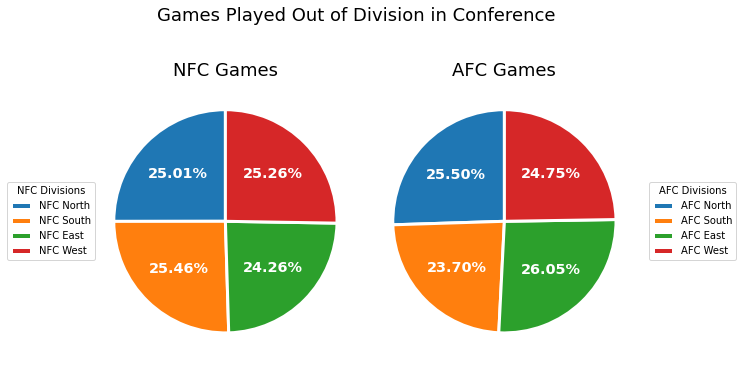

In [97]:
#Looking at all games to see if the same divisions as above have the most wins

#Calculating values counts of wins for each conference and division in the NFL
afc_north = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC North'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC North'])
afc_south = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC South'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC South'])
afc_east = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC East'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC East'])
afc_west = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC West'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC West'])
nfc_north = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC North'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC North'])
nfc_south = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC South'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC South'])
nfc_east = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC East'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC East'])
nfc_west = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC West'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC West'])

#Looking to see what divisions in each confrences is the strongest when against other divisions
#Comparing games only played in their own conference but not in their own division

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
fig.subplots_adjust(wspace=0)

#Creating NFC pie chart
nfc_labels = ['NFC North', 'NFC South', 'NFC East', 'NFC West']
nfc_values = [nfc_north, nfc_south, nfc_east, nfc_west]

patches, texts, pcts = ax1.pie(
    x=nfc_values, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax1.set_title('NFC Games', fontsize=18)
ax1.legend(patches, nfc_labels,
          title="NFC Divisions",
          loc="center left",
          bbox_to_anchor=(-0.3, 0, 0.5, 1))

#Creating AFC pie chart
afc_labels = ['AFC North', 'AFC South', 'AFC East', 'AFC West']
afc_values = [afc_north, afc_south, afc_east, afc_west]

patches, texts, pcts = ax2.pie(
    x=afc_values, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax2.set_title('AFC Games', fontsize=18)
ax2.legend(patches, afc_labels,
          title="AFC Divisions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle('Games Played Out of Division in Conference',x=0.5, y=0.8, fontsize=18, va='top')


****

Notes for analysis of each division and individual team.


****

In [114]:
#Clean the capacity column to convert the values in to a integer
nfl['Capacity'] = nfl['Capacity'].str.replace(',','')
print(nfl['Capacity'].dtypes)
nfl['Capacity'] = nfl['Capacity'].astype(str).astype(int)
print(nfl['Capacity'].dtypes)

object
int64


count     3999.000000
mean     70677.677919
std       5657.495029
min      61500.000000
25%      66200.000000
50%      69143.000000
75%      74867.000000
max      82500.000000
Name: Capacity, dtype: float64


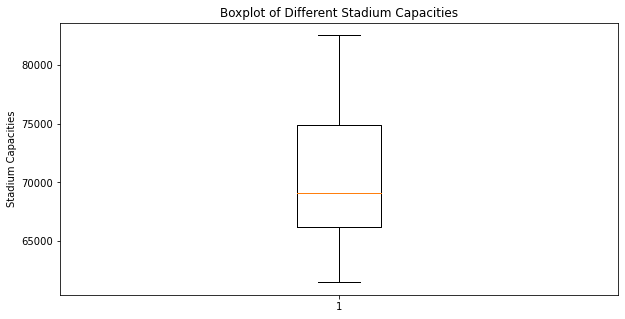

In [124]:
#Looking at the different stadium capacities

print(nfl['Capacity'].describe())

fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(nfl['Capacity'])
plt.title('Boxplot of Different Stadium Capacity')
plt.ylabel('Stadium Capacity')
plt.show()

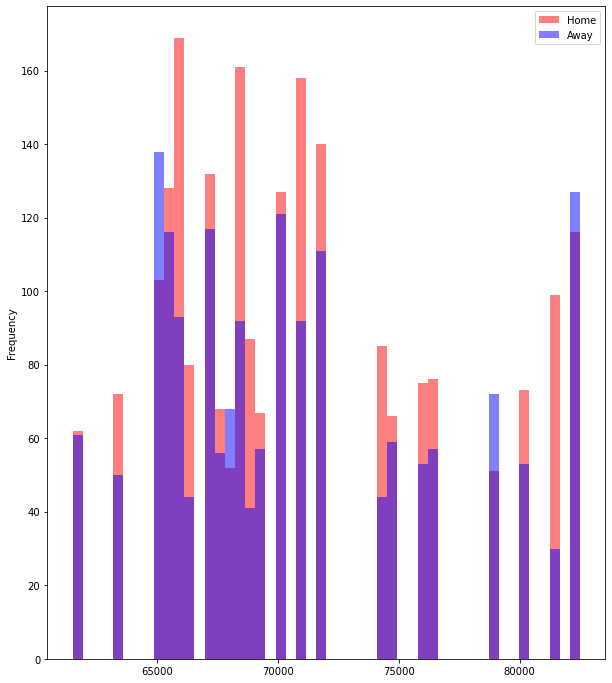

In [132]:


#hist_trans(df_train, 'Age')
plt.figure(figsize=(10,12))
gamehome = nfl[nfl['H_WinTeam'] == 1]
gameaway = nfl[nfl['H_WinTeam'] == 0]
gamehome['Capacity'].plot.hist(alpha=0.5,color='red',bins=50)
gameaway['Capacity'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Home Wins','Away Wins'])
plt.show()

In [134]:
#nfl['H_WinTeam'].groupby(nfl['Capacity']).value_counts().unstack()
nfl.groupby(['Capacity','Fan_Repu','H_WinTeam']).size().head(10)

Capacity  Fan_Repu  H_WinTeam
61500     1         0.0           61
                    1.0           62
63400     0         0.0           50
                    1.0           72
65000     0         0.0          138
                    1.0          103
65326     0         0.0           61
                    1.0           61
65515     0         0.0           55
                    1.0           67
dtype: int64

In [130]:
nfl[['Capacity','Fan_Repu']].groupby(nfl['H_WinTeam']).size()

H_WinTeam
0.0    1752
1.0    2247
dtype: int64

In [153]:
#Only using the games played in the same conference and outside of the division
#'HomeTeam', 'Opened', 'Cost', 'Capacity'
stadium_headers = ['H_WinTeam', 'Turf', 'Stadium_Roof', 'Fan_Repu','Weather', 'Location']
stadium_stats = nfl[stadium_headers]
stadium_stats.head()

H_WinTeam       Turf Stadium_Roof  Fan_Repu Weather Location
0        1.0  FieldTurf       Closed         0     Low    South
1        0.0      Grass         Open         1     Med   Middle
2        1.0      Grass         Open         1     Med   Middle
3        0.0      Grass         Open         0     Low    South
4        0.0      Grass         Open         1    Hard    North

In [154]:
#Converting variables in to dummy values
pd.get_dummies(stadium_stats)

H_WinTeam  Fan_Repu  Turf_FieldTurf  Turf_Fieldturf  Turf_Grass  \
0           1.0         0               1               0           0   
1           0.0         1               0               0           1   
2           1.0         1               0               0           1   
3           0.0         0               0               0           1   
4           0.0         1               0               0           1   
...         ...       ...             ...             ...         ...   
4004        1.0         1               0               0           1   
4005        0.0         0               1               0           0   
4006        1.0         1               0               1           0   
4007        0.0         0               1               0           0   
4008        1.0         0               0               1           0   

      Stadium_Roof_Closed  Stadium_Roof_Open  Stadium_Roof_Retractable  \
0                       1                  0                         0   
1                       0                  1                         0   
2                       0                  1                         0   
3                       0                  1                         0   
4                       0                  1                         0   
...                   ...                ...                       ...   
4004                    0                  1                         0   
4005                    0                  1                         0   
4006                    1                  0                         0   
4007                    1                  0                         0   
4008                    0                  0                         1   

      Weather_Hard  Weather_Low  Weather_Med  Location_Middle  Location_North  \
0                0            1            0                0               0   
1                0            0            1                1               0   
2                0            0            1                1               0   
3                0            1            0                0               0   
4                1            0            0                0               1   
...            ...          ...          ...              ...             ...   
4004             1            0            0                0               1   
4005             1            0            0                0               1   
4006             0            1            0                0               1   
4007             0            1            0                0               0   
4008             0            1            0                1               0   

      Location_South  
0                  1  
1                  0  
2                  0  
3                  1  
4                  0  
...              ...  
4004               0  
4005               0  
4006               0  
4007               1  
4008               0  

[3999 rows x 14 columns]

In [157]:
stadium_home = stadium_stats[stadium_stats['H_WinTeam'] == 1]
stadium_home[['Turf', 'Stadium_Roof', 'Fan_Repu','Weather', 'Location']].apply(pd.Series.value_counts)

Turf  Stadium_Roof  Fan_Repu  Weather  Location
0               NaN           NaN    1432.0      NaN       NaN
1               NaN           NaN     815.0      NaN       NaN
Closed          NaN         395.0       NaN      NaN       NaN
FieldTurf     609.0           NaN       NaN      NaN       NaN
Fieldturf     500.0           NaN       NaN      NaN       NaN
Grass        1138.0           NaN       NaN      NaN       NaN
Hard            NaN           NaN       NaN    834.0       NaN
Low             NaN           NaN       NaN    930.0       NaN
Med             NaN           NaN       NaN    483.0       NaN
Middle          NaN           NaN       NaN      NaN     761.0
North           NaN           NaN       NaN      NaN     891.0
Open            NaN        1484.0       NaN      NaN       NaN
Retractable     NaN         368.0       NaN      NaN       NaN
South           NaN           NaN       NaN      NaN     595.0